# WiDS 2023 - Codeup Submission
## Predict the arithmetic mean of the max and min observed temperature over the next 14 days for specific locations and start dates

## Project Description
Extreme weather events are sweeping the globe and range from heat waves, wildfires and drought to hurricanes, extreme rainfall and flooding. These weather events have multiple impacts on agriculture, energy, transportation, as well as low resource communities and disaster planning in countries across the globe.

Accurate long-term forecasts of temperature and precipitation are crucial to help people prepare and adapt to these extreme weather events. Currently, purely physics-based models dominate short-term weather forecasting. But these models have a limited forecast horizon. The availability of meteorological data offers an opportunity for data scientists to improve sub-seasonal forecasts by blending physics-based forecasts with machine learning. Sub-seasonal forecasts for weather and climate conditions (lead-times ranging from 15 to more than 45 days) would help communities and industries adapt to the challenges brought on by climate change.

Participants will submit forecasts of temperature and precipitation for one year, competing against the other teams as well as official forecasts from NOAA.

## Project Goals
* Determine which columns to use for our data exploration.
* Explore to find features that indicate the ```contest-tmp2m-14d__tmp2m```.
* Based on the findings predict the ```contest-tmp2m-14d__tmp2m``` for the test_data.
* Submit our finidings to the WiDS 2023 competition.

# Imports

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import os

from sklearn.model_selection import train_test_split
import sklearn.preprocessing
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

import warnings
warnings.filterwarnings("ignore")

from scipy import stats
import re

import wrangle as w
#import explore as e
#import modeling as m

# Acquire

* Data acquired from [Kaggle](https://www.kaggle.com/competitions/widsdatathon2023/data)
* It contained 375734 rows and 245 columns before cleaning
* Each row represents a specific location on a specific start date
* Each column represents a weather/climate measurement

# Prepare

**Prepare Actions:**
* ???
* ???
* Encoded categorical variables
* Split data into train, validate and test (approx. 60/25/15), stratifying on 'upset'
* Scaled continuous variable
* Outliers have not been removed for this iteration of the project

## Data dictionary
| Feature | Definition | Type |
|:--------|:-----------|:-------
|**????**| ?????? | *string*|
|**?????**| ????? | *float*|
|**Target variable**
|**contest-tmp2m-14d__tmp2m**| the arithmetic mean of the max and min observed temperature over the next 14 days | *float* |


In [2]:
# acquiring data
df = w.get_explore_data()

# cleaning data
df = w.prep_data(df)

# rename
df = w.rename_data(df)

# splitting data into train, validate, and test
train, validate, test = w.split_data(df)

## A brief look at the data

In [3]:
train.head()

,index,lat,lon,startdate,contest-pevpr-sfc-gauss-14d__pevpr,nmme0-tmp2m-34w__cancm30,nmme0-tmp2m-34w__cancm40,nmme0-tmp2m-34w__ccsm30,nmme0-tmp2m-34w__ccsm40,nmme0-tmp2m-34w__cfsv20,...,wind-vwnd-925-2010-11,wind-vwnd-925-2010-12,wind-vwnd-925-2010-13,wind-vwnd-925-2010-14,wind-vwnd-925-2010-15,wind-vwnd-925-2010-16,wind-vwnd-925-2010-17,wind-vwnd-925-2010-18,wind-vwnd-925-2010-19,wind-vwnd-925-2010-20
116277,116277,0.454545,0.300000,2014-10-19,294.86,19.65,18.23,21.06,23.44,21.37,...,-23.44,-75.14,96.83,21.82,-51.37,16.12,-36.95,12.52,35.93,16.26
237629,237629,0.727273,0.066667,2014-10-25,127.70,10.01,10.90,8.87,9.94,9.49,...,-29.33,-50.80,49.26,22.20,-12.60,4.19,-32.98,30.86,39.48,-7.82
272599,272599,0.772727,0.700000,2016-06-29,481.48,18.94,25.94,19.66,22.09,18.80,...,-1.99,8.71,-10.39,17.81,-27.76,-61.51,-4.77,30.37,22.88,32.52
205713,205713,0.636364,0.500000,2015-06-30,453.35,18.86,19.47,19.17,17.37,17.12,...,-25.56,22.00,-47.70,50.22,20.15,7.87,20.50,4.91,11.63,25.57
120041,120041,0.454545,0.466667,2015-02-05,135.47,-3.56,-2.51,-5.36,-0.17,0.08,...,58.84,-63.19,16.76,-27.97,-14.79,-13.85,-27.72,5.55,-3.12,-25.84


# Explore

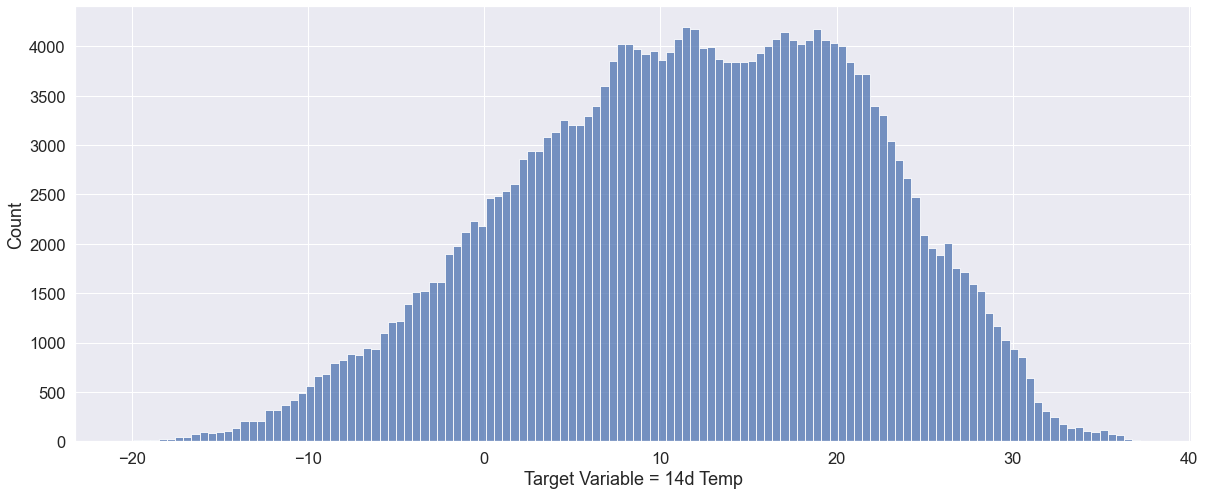

In [8]:
#set font size
sns.set(font_scale=1.5)

fig, ax = plt.subplots(figsize=(20, 8))
sns.histplot(data=train, x='mean_temp')
plt.xlabel('Target Variable = 14d Temp');

## Is there a difference in the temperatures in different climateregions?

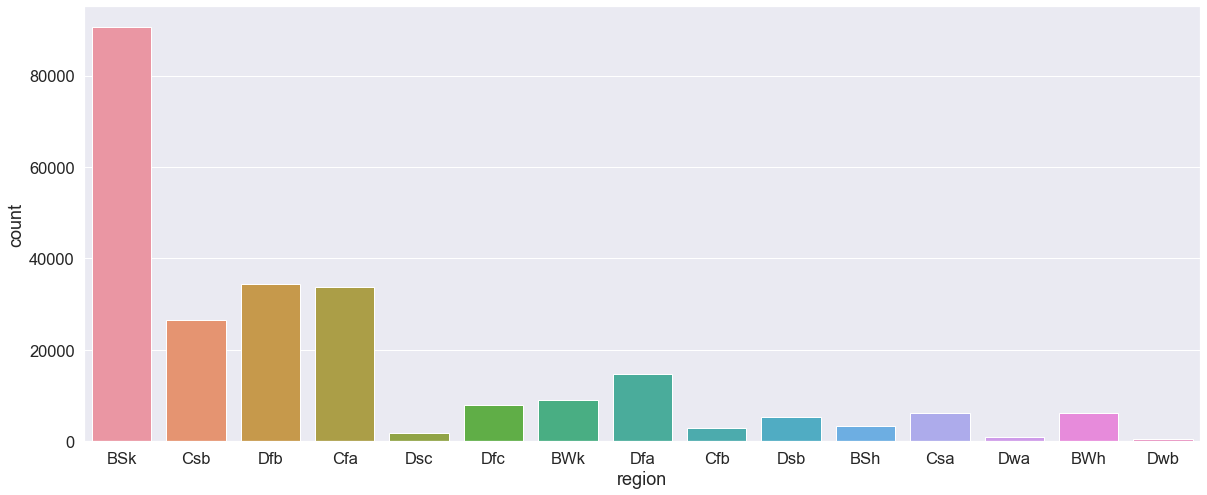

In [9]:
fig, ax = plt.subplots(figsize=(20, 8))
sns.countplot(x='region', data=train)
plt.show()

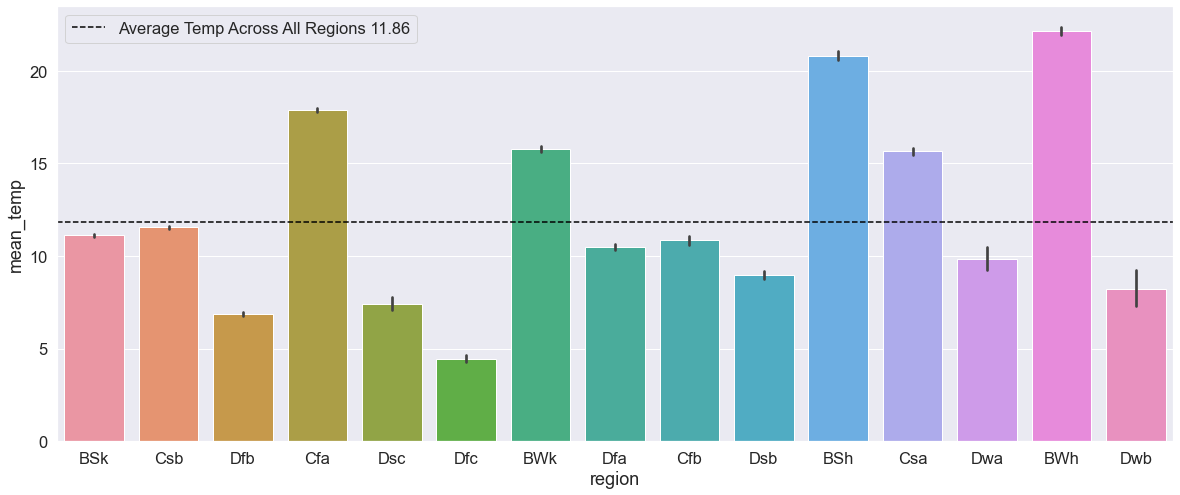

In [11]:
fig, ax = plt.subplots(figsize=(20, 8))
sns.barplot(x='region', y='mean_temp', data=train)
rate = df['mean_temp'].mean()
plt.axhline(rate, label = f'Average Temp Across All Regions {rate:.2f}', linestyle='--', color='black')
plt.legend()
plt.show()

We should bin these based on first letter of region and run Kruskall-Wallis.

## Does elevation impact temperature?

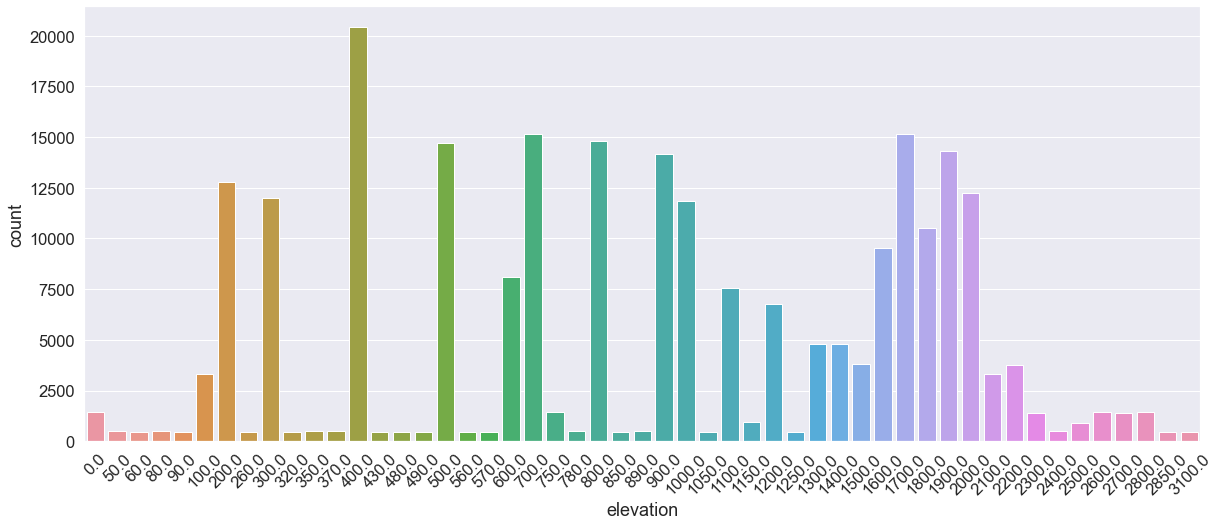

In [17]:
fig, ax = plt.subplots(figsize=(20, 8))
sns.countplot(x='elevation', data=train)
plt.xticks(rotation = 45)
plt.show()

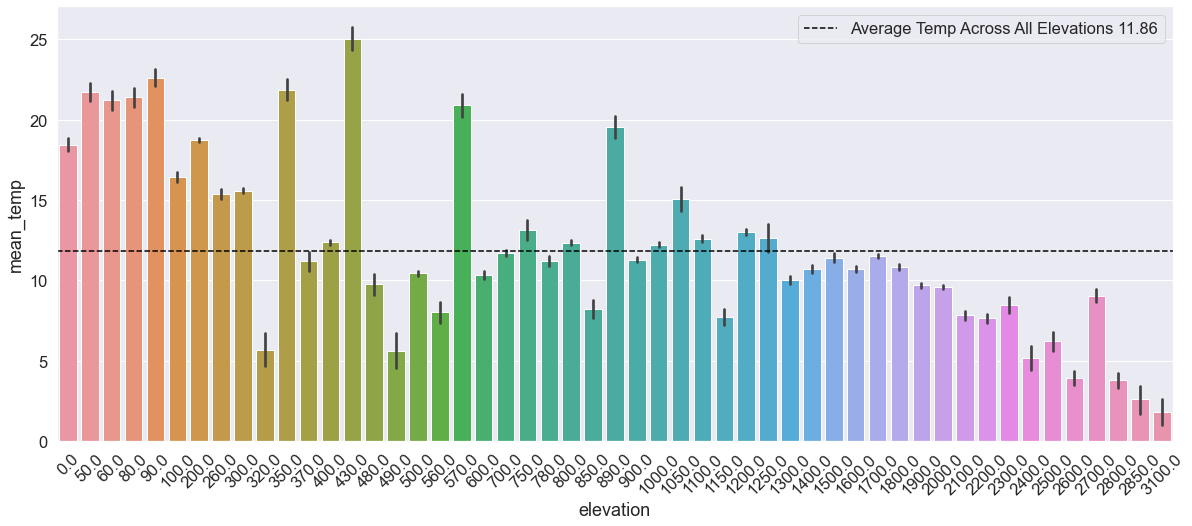

In [15]:
fig, ax = plt.subplots(figsize=(20, 8))
sns.barplot(x='elevation', y='mean_temp', data=train)
rate = df['mean_temp'].mean()
plt.axhline(rate, label = f'Average Temp Across All Elevations {rate:.2f}', linestyle='--', color='black')
plt.xticks(rotation = 45)
plt.legend()
plt.show()

We should bin these into four and run Kruskall-Wallis.

## Is there a correlation between precipitation and mean_temp?

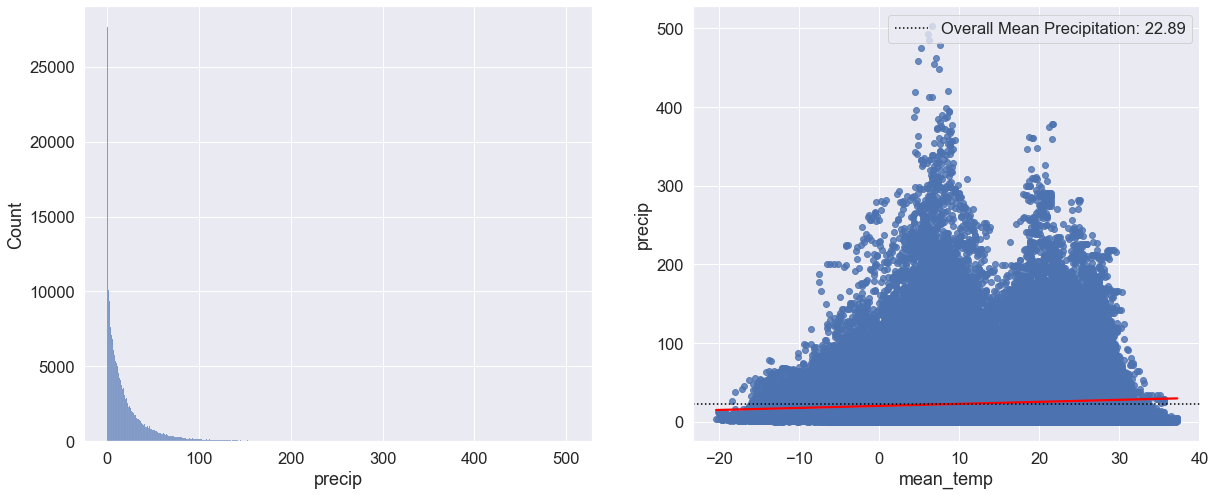

In [40]:
fig, ax = plt.subplots(1, 2, figsize=(20, 8))

sns.histplot(data=train, x ='precip', ax=ax[0])

sns.regplot(x='mean_temp', y='precip', data=train, line_kws={'color': 'red'}, ax=ax[1])
rate = train['precip'].mean()
ax[1].axhline(rate,  label = f'Overall Mean Precipitation: {rate:.2f}', linestyle='dotted', color='black')
ax[1].legend()
plt.show()

In [34]:
corr, p = stats.spearmanr(train['precip'], train['mean_temp'])
print(f'p-value: {p}')

p-value: 6.737735320241618e-222


Distribution is skewed. We will not put this in our model.

## Is there a correlation between potential evap and mean_temp?

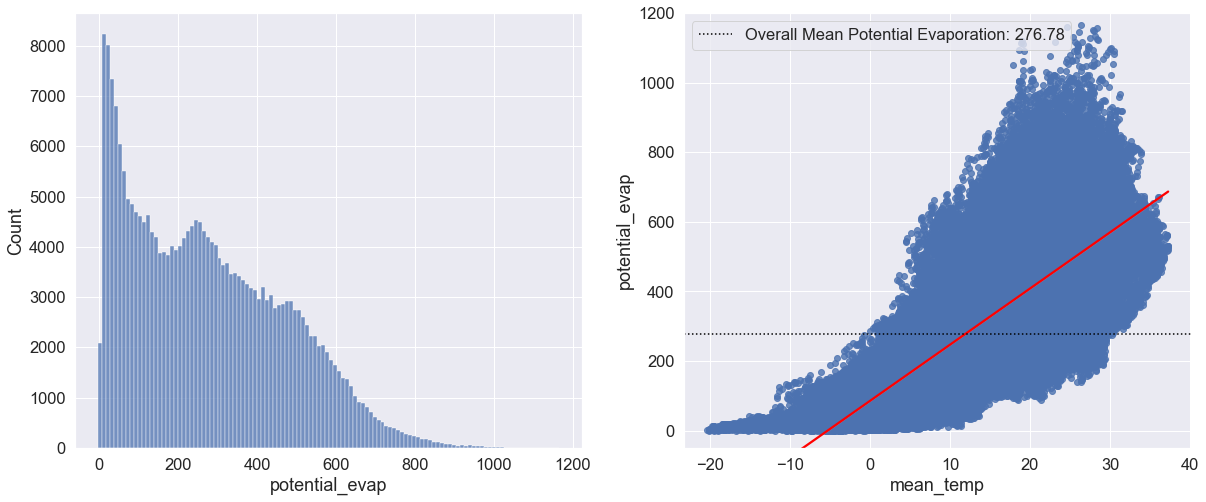

In [41]:
fig, ax = plt.subplots(1, 2, figsize=(20, 8))

sns.histplot(data=train, x ='potential_evap', ax=ax[0])

sns.regplot(x='mean_temp', y='potential_evap', data=train, line_kws={'color': 'red'}, ax=ax[1])
rate = train['potential_evap'].mean()
ax[1].axhline(rate,  label = f'Overall Mean Potential Evaporation: {rate:.2f}', linestyle='dotted', color='black')
ax[1].legend()
ax[1].set_ylim(-50,1200)
plt.show()

In [42]:
corr, p = stats.spearmanr(train['potential_evap'], train['mean_temp'])
print(f'p-value: {p}')

p-value: 0.0


There is a linear correlation so we will take this to the model.

# Exploration Summary

* ?????

# Features I am moving to modeling With
| Feature | Reason | 
|:--------|:-----------|
|**????**| $t-test$ results|
|**???**| $chi^2$ test results|
|**????**| $chi^2$ test results|


# Features I'm not moving to modeling with
| Feature | Reason | 
|:--------|:-----------|
|**?????**| >>>>>|
|**?????**| >>>>>|
|**?????**| >>>>>|
|**?????**| >>>>>|

# Modeling
* 

In [17]:
# prep data for modeling
train_X, validate_X, test_X, train_y, validate_y, test_y = m.model_prep(train,validate,test)

# Comparing Models

* ????

## Best Model on Test

### Modeling Summary

* ?????

# Conclusions

### Exploration

* ????

### Modeling

* ????

### Recommendations

* ?????

### Next Steps
* ?????